In [1]:
# importing datetime module for now() 
import datetime as dt
    
# using now() to get current time 
current_time = dt.datetime.now() 

print ("{} " .format(current_time))

2022-05-07 07:05:11.404335 


## THEORY




 1. In training your nueral network using Batch Gradient Descent. If you plot the validation error at every epoch notice that the validation error consistently goes up, what is likely going on? How can you fix this?.




ANS: 
It is likely that the learning rate is too high and the algorithm is diverging. 
To confirm the possible fix, we check the training error.
1.	 If it also goes up, then this is clearly the problem and you should reduce the learning rate.
2.	if the training error is not going up, then my model is overfitting the training set and I should stop training.





<h3>Question  #2:</h3>

<b> 2. You want to show your friend how your model learn. So, you plot the learning curves. However, you notice a large gap between the training error and the validation error. What do you think is happening? Describe, at least, one way to solve this.</b>



ANS:
I think the model is overfitting if the validation error is higher than the training error. Ways that I can fix this problems are (NOTE: one method is required by the question):
1. Reduce the number of hidden layers in my ANN (in general term: reduce the degree of freedom)
2. Reduce the number of nodes in each hidden layer of my ANN ((in general term: reduce the degree of freedom)
3. increase the size of my training set (i.e., use more data for training)



<h3>Question  #3:</h3>

<b> 3. Suppose that you want to build a machine learning model but the features in your training set have very different scales. Which algorithm do you think will surfer from this, considering neural networks and Random Forest, and how? What can you do about it?</b>



ANS:
Tree-based algorithms like random forest are not affected differently by feature that have very different scale from features that have the same scale. However, Gredient Descent Based algorithms like Artificial Neural Networks suffers from feature that have very different scale. I will scale the feature (since tree-based algorithm works equally in both cases. In that way, i can compare both algorithms without bias). 

## PRACTICALS

In [9]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [16]:
df = pd.read_csv("concrete.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


A model to predict the compressive strength of cement will be built using several different features.


<h3>Question  #1:</h3>

<b> 1. Rename the columns into short names and display information about the dataset.</b>



In [17]:
# place your code here 
print(df.columns)
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
       'Water  (component 4)(kg in a m^3 mixture)':'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'plasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'course_aggr',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggr', 'Age (day)':'age',
       'Concrete compressive strength(MPa, megapascals) ':'concrete_strength'})
print(df.columns)
df.info()


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')
Index(['cement', 'blast_furnace', 'fly_ash', 'water', 'plasticizer',
       'course_aggr', 'fine_aggr', 'age', 'concrete_strength'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cement             1030 non-null   float64
 1   blast_furnace      1030 non-null   float64
 2   fly_ash            1030 non-null   float6


<h3>Question  #2:</h3>

<b> 2. Replace the missing values.</b>



In [18]:
# place your code here
print(df.isnull().sum())
print('\nComment:\n----------------------\n ->No missing values to replace')

cement               0
blast_furnace        0
fly_ash              0
water                0
plasticizer          0
course_aggr          0
fine_aggr            0
age                  0
concrete_strength    0
dtype: int64

Comment:
----------------------
 ->No missing values to replace



<h3>Question  #3:</h3>

<b>3. Compute a correlation matrix of all the variables and visualise using a heat map.</b>



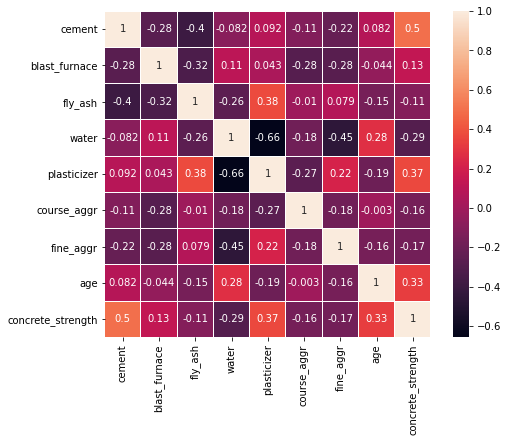

array([[ 1.        , -0.27521591, -0.39746734, -0.08158675,  0.09238617,
        -0.10934899, -0.22271785,  0.08194602,  0.49783192],
       [-0.27521591,  1.        , -0.3235799 ,  0.10725203,  0.04327042,
        -0.28399861, -0.28160267, -0.04424602,  0.13482926],
       [-0.39746734, -0.3235799 ,  1.        , -0.25698402,  0.37750315,
        -0.00996083,  0.07910849, -0.15437052, -0.10575492],
       [-0.08158675,  0.10725203, -0.25698402,  1.        , -0.65753291,
        -0.1822936 , -0.45066117,  0.27761822, -0.28963338],
       [ 0.09238617,  0.04327042,  0.37750315, -0.65753291,  1.        ,
        -0.26599915,  0.22269123, -0.19270003,  0.36607883],
       [-0.10934899, -0.28399861, -0.00996083, -0.1822936 , -0.26599915,
         1.        , -0.17848096, -0.00301588, -0.16493461],
       [-0.22271785, -0.28160267,  0.07910849, -0.45066117,  0.22269123,
        -0.17848096,  1.        , -0.1560947 , -0.16724125],
       [ 0.08194602, -0.04424602, -0.15437052,  0.27761822, -0

In [19]:
# place your code here
corr_mat = df.astype(float).corr(method='pearson') 
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat,linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()
corr_mat.values



<h3>Question  #4:</h3>

<b>4. Draw a scatter plot of four features of your choice against the label.</b>



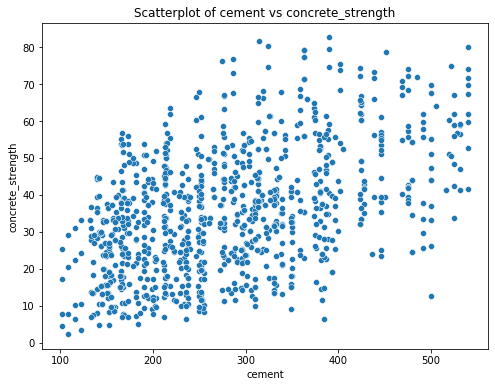

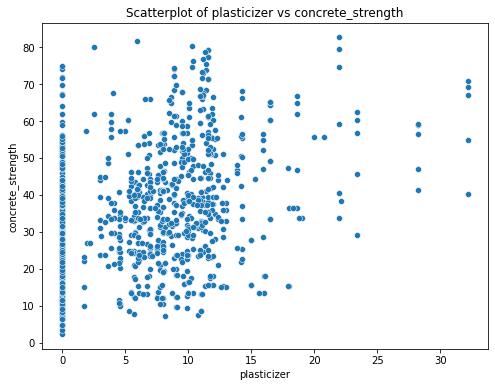

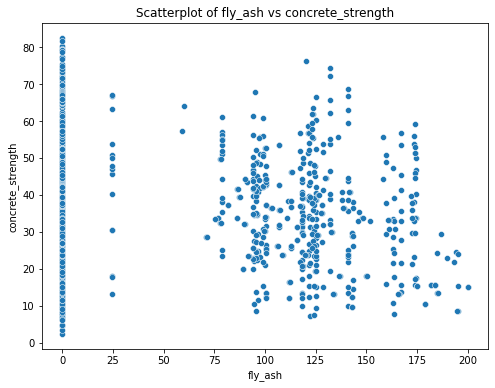

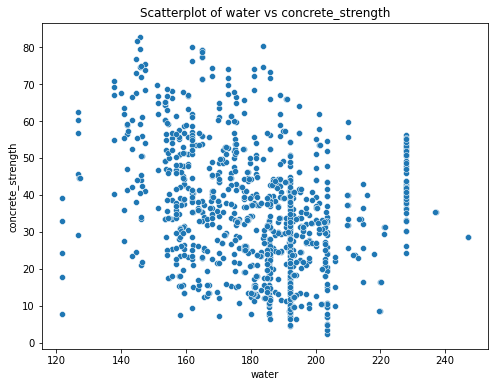

In [20]:
# place your code here
four_features = ['cement', 'plasticizer', 'fly_ash', 'water']
label = 'concrete_strength'
for col in four_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x = df[col], y = df[label])
    plt.title('Scatterplot of ' + col + ' vs ' + label)
    plt.show()


<h3>Question  #5:</h3>

<b>5. Detect and remove outliers.</b>



C:\Users\igwek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


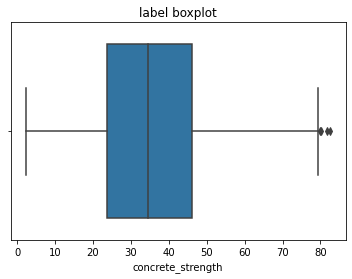

C:\Users\igwek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


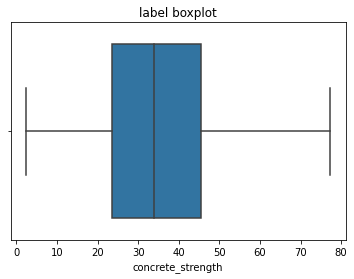


Comment:
----------------------
 ->NOTE: Different methods exist


In [21]:
# place your code here

#
sns.boxplot(df[label])
plt.title("label boxplot")
plt.show()

last_df = df[df.concrete_strength < 78]
sns.boxplot(last_df[label])
plt.title("label boxplot")
plt.show()
print('\nComment:\n----------------------\n ->NOTE: Different methods exist')


<h3>Question  #6:</h3>

<b> 6. Find the 68 percentile of component 1(cement).</b>



In [23]:
# place your code here

last_df.cement.quantile(0.68)

# --------OR-------


322.476

In [24]:
p = np.percentile(last_df.cement, 68) 
print("68 percentile = "+str(p))

68 percentile = 322.476



<h3>Question  #7:</h3>

<b>7. Visualize the distribution of the label and comment.</b>



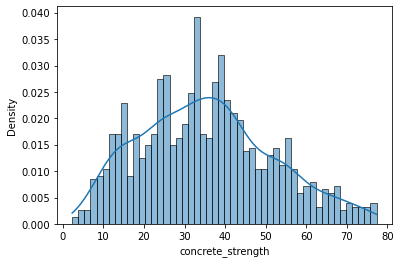

In [25]:
# place your code here
sns.histplot(last_df[label], kde=True, stat='density', bins=50)
plt.show()



<h3>Question  #8:</h3>

<b> 8. Split the data into training and test sets (80:20), standardize the data and build a regression ( SVM, Multiple Linear regression, etc) model that predicts the compressive strength of the cement.</b>



In [26]:
# place your code here
#(NOTE: No strict rule on model to biuld)


#standardize data
df_norm = (last_df-last_df.mean())/last_df.std()

#separate the other attributes from the predicting attribute
all_features = ['cement', 'blast_furnace', 'fly_ash', 'water', 
                'plasticizer','course_aggr', 'fine_aggr', 'age']
X = df_norm[all_features]

#separte the predicting attribute into Y for model training 
y = df_norm[label].values

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data to 80-20%
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state =0)
print("Train set has: {}" .format(X_train.shape[0]), " rows and {}".format(X_train.shape[1]), " columns. \n")
print("Test set has: {}" .format(X_test.shape[0]), " rows and {}".format(X_test.shape[1]), " columns. \n")


Train set has: 816  rows and 8  columns. 

Test set has: 204  rows and 8  columns. 



In [27]:
df_norm.head() #verifying the dataset

,cement,blast_furnace,fly_ash,water,plasticizer,course_aggr,fine_aggr,age,concrete_strength
1,2.491118,-0.850824,-0.853878,-0.927026,-0.613262,1.054772,-1.218122,-0.275618,1.636032
2,0.501942,0.807828,-0.853878,2.167489,-1.033597,-0.524282,-2.237905,3.541992,0.301536
3,0.501942,0.807828,-0.853878,2.167489,-1.033597,-0.524282,-2.237905,5.040641,0.349681
4,-0.781676,0.690267,-0.853878,0.479572,-1.033597,0.071393,0.641118,4.961765,0.550288
5,-0.135553,0.476097,-0.853878,2.167489,-1.033597,-0.524282,-1.292740,0.702447,0.718797


In [28]:
df_norm.describe()[4:9]

,cement,blast_furnace,fly_ash,water,plasticizer,course_aggr,fine_aggr,age,concrete_strength
25%,-0.844947,-0.850824,-0.853878,-0.791055,-1.033597,-0.524282,-0.542826,-0.606899,-0.726804
50%,-0.134595,-0.594751,-0.853878,0.167776,0.034055,-0.062120,0.075884,-0.275618,-0.088258
75%,0.669704,0.807828,0.992147,0.479572,0.664559,0.726123,0.634899,0.166089,0.616333
max,2.491118,3.332469,2.268605,3.058334,4.380326,2.210178,2.719237,5.040641,2.587216


In [1]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
lr = LinearRegression()
# fitting the training data
lr_model = lr.fit(X_train,y_train)
#predicting 
lr_predictions =  lr_model.predict(X_test)

NameError: name 'X_train' is not defined


<h3>Question  #9:</h3>

<b> 9. Evalute your model using appropriate metrics.</b>



In [30]:
# place your code here
#(Confusion Matrix is recommended too)
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score = r2_score(y_test, lr_predictions)
print('The r2 score is = {:0.3f} \n' .format(score))
print('The mean_squared_error is =  {:0.3f} \n' .format(mean_squared_error(y_test, lr_predictions)))
print('The root_mean_squared error of is =  {:0.0f} \n' .format(np.sqrt(mean_squared_error(y_test, lr_predictions))))

The r2 score is = 0.550 

The mean_squared_error is =  0.382 

The root_mean_squared error of is =  1 



In [33]:
from sklearn.ensemble import RandomForestRegressor
#train the model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0).fit(X_train, y_train) 

#Make predictions
rf_predictions = rf_model.predict(X_test)
# predicting the accuracy score
score = r2_score(y_test, rf_predictions)
print('The r2 score is = {:0.3f} \n' .format(score))
print('The mean_squared_error is =  {:0.3f} \n' .format(mean_squared_error(y_test, rf_predictions)))
print('The root_mean_squared error of is =  {:0.0f} \n' .format(np.sqrt(mean_squared_error(y_test, rf_predictions))))

The r2 score is = 0.923 

The mean_squared_error is =  0.066 

The root_mean_squared error of is =  0 




<h3>Question  #10:</h3>

<b> 10. Use the trained model to predict the results and comment.</b>



In [34]:
# place your code here

#( it is enough to create a random case and test your prediction or to predict the test cases.
# However, I show you how to save your model best model as a file and use it later)
# Save the model as a pickle file
import joblib
filename = './rf_model.pkl'
joblib.dump(rf_model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[602.5,142.5,0.0,18.0,23.0,932.0,394.0,270]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
1.62
